Stock Data Analysis Report

This report provides an analysis of Amazon's stock performance over the past 5 years. It includes a detailed examination of the Relative Strength Index (RSI) to evaluate stock trends and volatility. We also compare Amazon's performance with key competitors like Walmart, eBay, and Alibaba, and analyze how it stands against the S&P 500 index for a broader market perspective.

The questions below were answered to generate insight on the stock data.

1. How has Amazon’s stock price changed over the last 5 years?
2. Is Amazon's stock growth consistent, or are there significant periods of volatility?
3. Which of Amazon's competitors (Walmart, eBay, Alibaba) has shown the most similar growth pattern?
4. How does Amazon’s stock performance compare with the S&P 500 index?
5. Has Amazon consistently outperformed the overall market, or are there periods where it lagged behind?
6. What does Amazon’s correlation with the S&P 500 reveal about its sensitivity to overall market movements?
7. How correlated is Amazon’s stock with those of Walmart, eBay, and Alibaba?
8. What significant market events (e.g., economic crises, regulatory changes) have impacted Amazon’s stock price in the last 5 years?
9. How do Amazon’s moving averages compare to its competitors and the S&P 500?
10. What does the Relative Strength Index (RSI) indicate about Amazon’s stock momentum compared to its competitors?
11. How has the trading volume for Amazon’s stock changed over time, especially during significant price movements?
12. Is there a relationship between trading volume spikes and significant price changes for Amazon?


In [ ]:
#import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import time
import plotly.graph_objects as go
from pdstock.stock import stockdata

Here, we load the stock data of the past 5 years for each company.

In [ ]:
#Generate stock data for Amazon, Competitors and S&P500
amazon_df = stockdata('AMZN', 5)
walmart_df = stockdata('WMT', 5)
ebay_df =    stockdata('EBAY', 5)
alibaba_df = stockdata('BABA', 5)
sp500_df = stockdata('%5EGSPC', 5)

sp500_df

As a time series data, we need to make the date column as the index.

In [ ]:
#Make Data column index of data
amazon_df = amazon_df.set_index('Date', drop=True)
walmart_df = walmart_df.set_index('Date', drop=True)
ebay_df = ebay_df.set_index('Date', drop=True)
alibaba_df = alibaba_df.set_index('Date', drop=True)
sp500_df = sp500_df.set_index('Date', drop=True)

sp500_df

What is data normalizing and Why do we need to normalize the data?

To compare Amazon's stock performance with its competitors, the stock data was normalized. 

Normalizing means adjusting the data so that all stock prices are on the same scale. This makes it easier to see how the stocks move relative to each other, without being influenced by their original price levels and we can then directly compare their performance and identify trends and patterns more clearly.

In [ ]:
#Normalize data to bring stock prices to the same level across

#Define function for normalizing the data
def normalize(df):
    return df/df.iloc[0] * 100

#Create new variable for each stock by applying the normalized function on the Close price of each stock
amazon_df['Normalized'] = normalize(amazon_df['Close'])
walmart_df['Normalized'] = normalize(walmart_df['Close'])
ebay_df['Normalized'] = normalize(ebay_df['Close'])
alibaba_df['Normalized'] = normalize(alibaba_df['Close'])
sp500_df['Normalized'] = normalize(sp500_df['Close'])

Below, we define a new dataframe where we use only the normalized data. We use a dictionary to do this.

In [ ]:
#Create a new dataframe putting together all the stocks as well as the variable (Close) to be analyzed

close_df = pd.DataFrame({
    'amazon':amazon_df['Normalized'], 
    'walmart':walmart_df['Normalized'], 
    'ebay':ebay_df['Normalized'], 
    'alibaba':alibaba_df['Normalized'], 
    'sp500':sp500_df['Normalized']
    })

close_df

In [53]:
# Confirm there are no null values in the data

close_df.isnull().sum()

amazon                         0
walmart                        0
ebay                           0
alibaba                        0
sp500                          0
Amazon_pct_change              1
Walmart_pct_change             1
eBay_pct_change                1
Alibaba_pct_change             1
Amazon_outperforms_Walmart     0
Amazon_outperforms_eBay        0
Amazon_outperforms_Alibaba     0
Amazon_outperforms_all         0
Amazon 30 days MA             29
Walmart 30 days MA            29
eBay 30 days MA               29
Alibaba 30 days MA            29
Sp500 30 days MA              29
amazon_rsi                     0
walmart_rsi                    0
ebay_rsi                       0
alibaba_rsi                    0
sp500_rsi                      0
dtype: int64

# 1. How has Amazon’s stock price changed over the last 5 years?

First, we look at how Amazon’s stock price has changed over the last 5 years.
To do this, we use the 30 days moving average indicator.

From the visualization below, we can see that Amazon stock close price over the last 5 years has what is called cyclical
movement pattern as the prices are affected by economic events.

<Axes: xlabel='Date'>

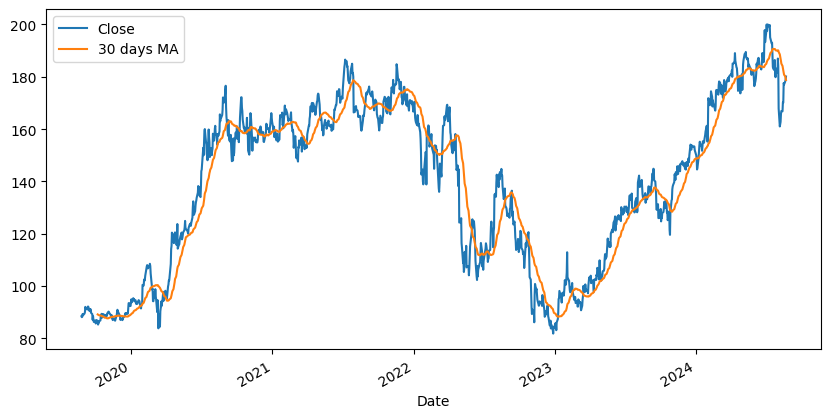

In [20]:
#Create a new variable for amazon stock moving average of 30 days
amazon_df['30 days MA'] = amazon_df['Close'].rolling(30).mean()

amazon_df[['Close', '30 days MA']].plot(figsize=[10,5])

plt.show()

# 2. Is Amazon's stock growth consistent, or are there significant periods of volatility?

Over the past five years, Amazon growth has not been consistent as seen in the visualization below. And this is not far fetched from the fact that the prices are moved by economic factors. 


<Axes: xlabel='Date', ylabel='Rolling Volatility'>

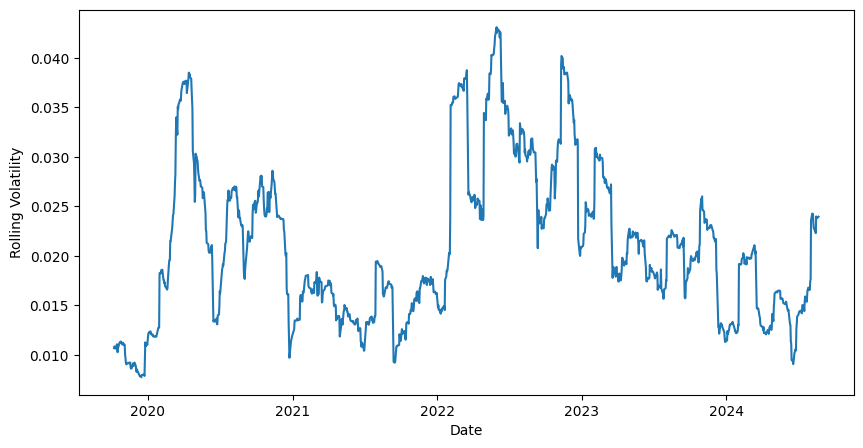

In [21]:
# Is Amazon's stock growth consistent, or are there significant periods of volatility?
amazon_df['Daily returns'] = amazon_df['Close'].pct_change()
amazon_df['Rolling Volatility'] = amazon_df['Daily returns'].rolling(window=30).std()

plt.figure(figsize=[10,5])
sns.lineplot(amazon_df['Rolling Volatility'])


plt.show()

# 3. How does Amazon's stock price trend compare with competitors such as Walmart, eBay and Alibaba?

Since we had earlier normalized the stock price to be on the same level, we can answer the comparison question above.
In comparison with competitors, we can see that Amazon stock performed well based on the visualization below. Amazon stock increased by over 50%.


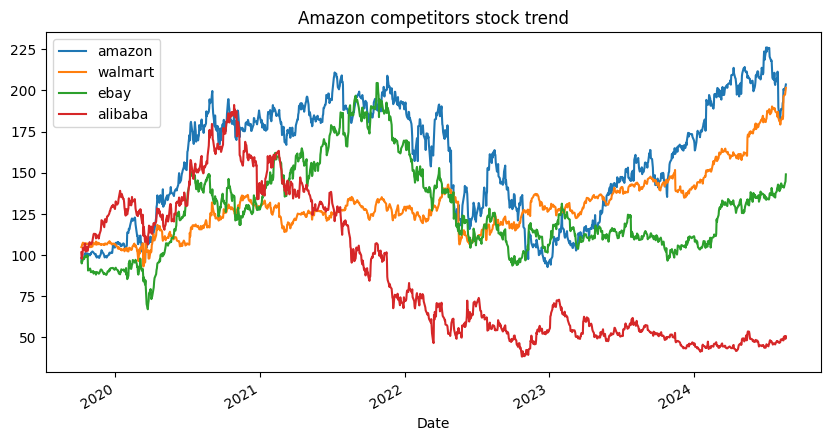

In [22]:
# Visualization

close_df[['amazon','walmart','ebay', 'alibaba']].plot(figsize=[10,5])
plt.title('Amazon competitors stock trend')


plt.show()

# 4. Which of Amazon's competitors (Walmart, eBay, Alibaba) has shown the most similar growth pattern?

eBay stock has shown similar growth pattern with Amazon with a strong correlation of 0.73.

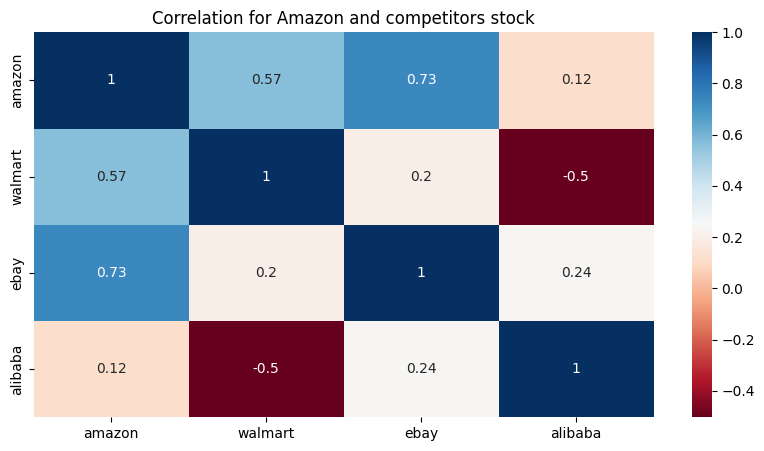

In [54]:
# calculate the correlation for Amazon and competitors stock.

correlation_ = close_df[['amazon','walmart', 'ebay', 'alibaba']].corr()

#Visualization
plt.figure(figsize=[10,5])
sns.heatmap(correlation_, annot=True, cmap='RdBu')
plt.title('Correlation for Amazon and competitors stock')
plt.show()

# 5. How does Amazon’s stock performance compare with the S&P 500 index?

Amazon stock performed well in comparison with S&P 500 Index.
There was a spike in the Amazon stock on July 2nd, 2024 which is currently the all-time high Amazon stock closing price from the period in review.

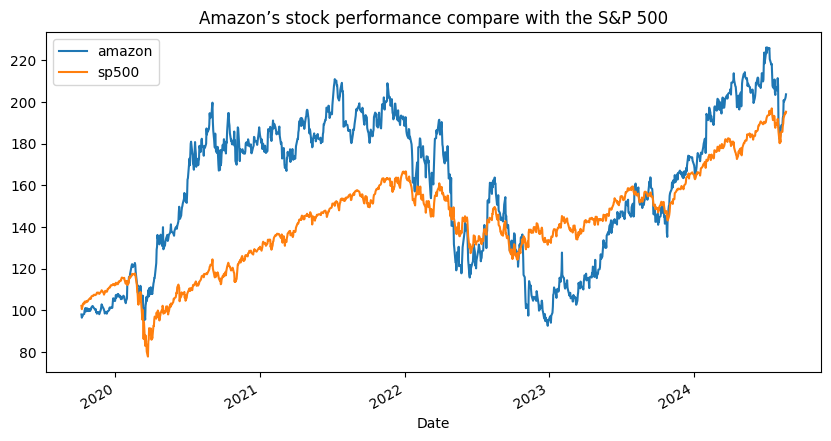

,Open,High,Low,Close,Adj Close,Volume,Normalized,30 days MA,Daily returns,Rolling Volatility
Date,,,,,,,,,,
2024-07-02,197.279999,200.429993,195.929993,200.0,200.0,45600000,226.133076,185.478334,0.014199,0.014189


In [25]:
# Visualization

close_df[['amazon','sp500']].plot(figsize=[10,5])
plt.legend()
plt.title('Amazon’s stock performance comparison with the S&P 500')
plt.show()

#reason for amazon stock price spike and the date
amazon_df.iloc[[amazon_df['Close'].argmax()]]

# 6. Has Amazon consistently outperformed the overall market or are there periods where it lagged behind?

Amazon stock has consistently outperformed the overall market. Although we can see that there are periods where it lagged behind, for example, ending of 2022 into early 2023, we see Amazon stock price experience some drop. However, the stock picked up and kept performing well. 

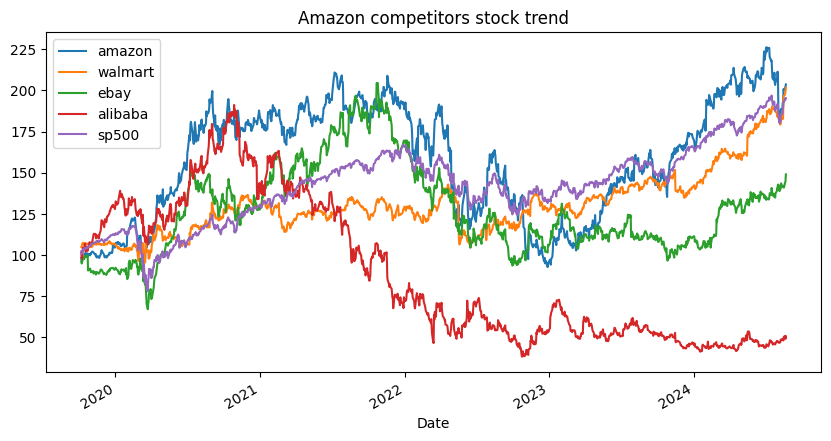

In [26]:
# Visualization

close_df[['amazon','walmart','ebay', 'alibaba','sp500']].plot(figsize=[10,5])
plt.title('Amazon competitors stock trend')


plt.show()

# 7. What does Amazon’s correlation with the S&P 500 reveal about its sensitivity to overall market movements?

In comparison with the overall market movement,Amazon stock has a strong correlation with a point of 0.63. 

<Axes: >

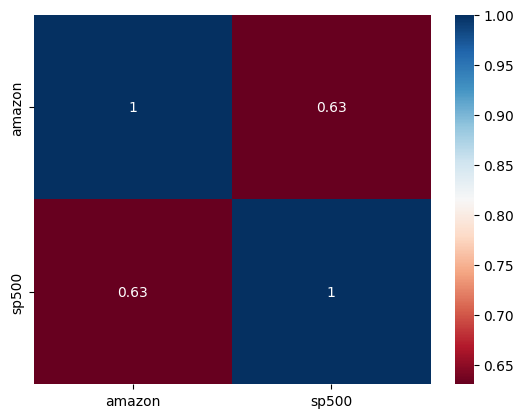

In [27]:
# Calculate Amazon stock correlation with S&P 500 stock
amazon_sp_correlation = close_df[['amazon', 'sp500']].corr()

#Visualize
sns.heatmap(amazon_sp_correlation, annot=True, cmap='RdBu')

plt.show()

# 8. How does Amazon’s moving averages compare to its competitors and the S&P 500?

Using 30 days moving average, Amazon stock performed well. Walmart and eBay stock remained steady while Alibaba stock had a huge deviation and fall.

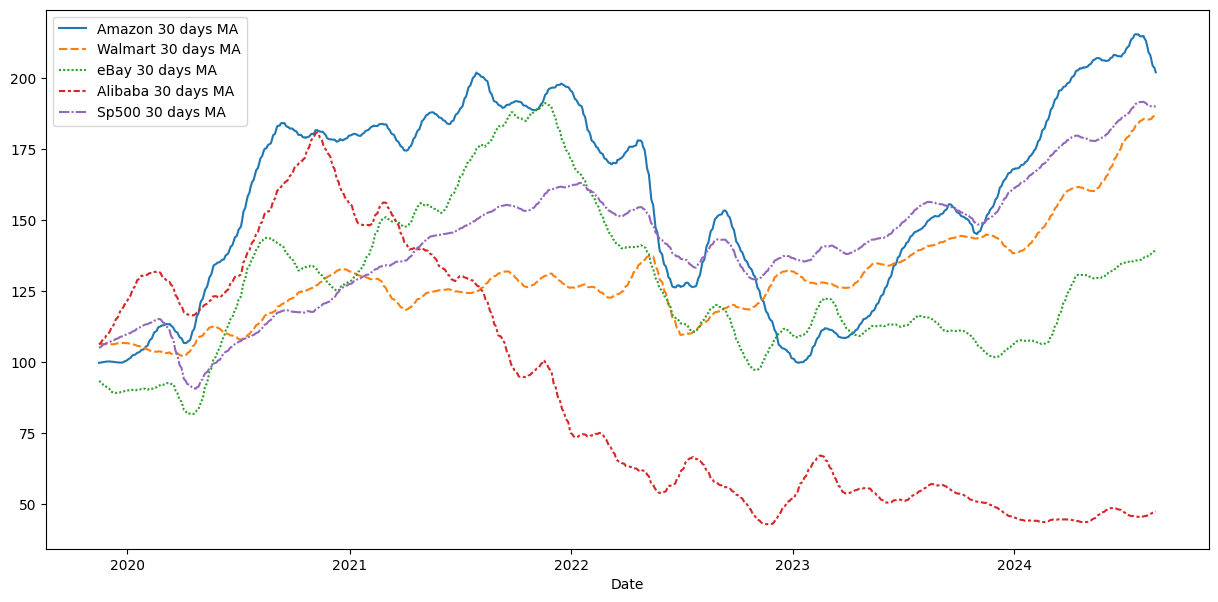

In [29]:
# Calculate 30 days moving average
close_df['Amazon 30 days MA'] = close_df['amazon'].rolling(30).mean()
close_df['Walmart 30 days MA'] = close_df['walmart'].rolling(30).mean()
close_df['eBay 30 days MA'] = close_df['ebay'].rolling(30).mean()
close_df['Alibaba 30 days MA'] = close_df['alibaba'].rolling(30).mean()
close_df['Sp500 30 days MA'] = close_df['sp500'].rolling(30).mean()

#Visualization
plt.figure(figsize=[15,7])
sns.lineplot(close_df[['Amazon 30 days MA','Walmart 30 days MA','eBay 30 days MA', 'Alibaba 30 days MA','Sp500 30 days MA' ]])


plt.show()

# 9. How has the trading volume for Amazon’s stock changed over time?
Amazon trading volume consistently maintained a flow. However, there are times where spikes occur in the volume amount. 

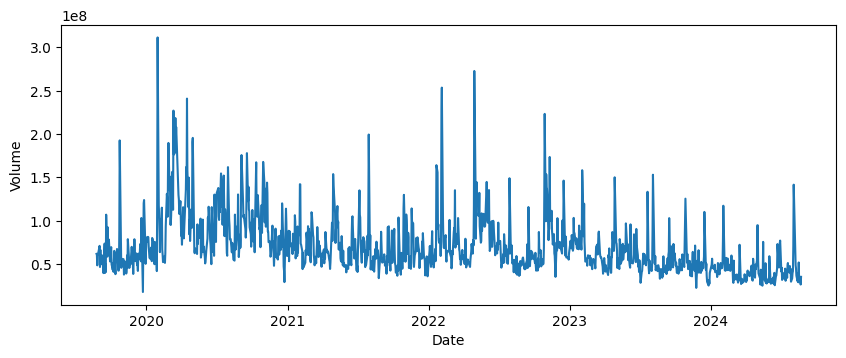

In [32]:
#visualization
plt.figure(figsize=[10,8])
plt.subplot(2,1,1)
sns.lineplot(amazon_df['Volume'])
plt.title('Amazon Stock Trading Volume')

plt.show()

# 10. Is there a relationship between trading volume spikes and significant price changes for Amazon? 
There is no relationship between Amazon stock volume and the price as the correlation is negtive with a point of -019. 

<Axes: >

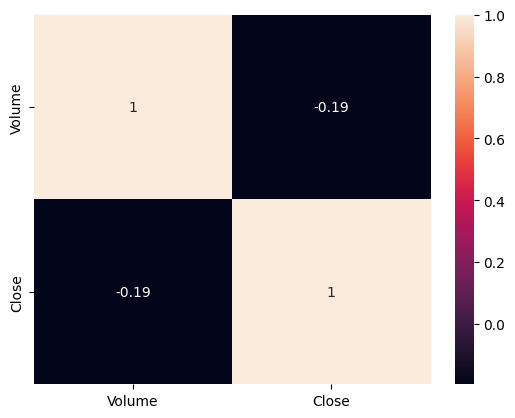

In [47]:
amazon_volume_price_correlation = amazon_df[['Volume', 'Close']].corr()

#Visualization
sns.heatmap(amazon_volume_price_correlation, annot=True)
plt.show()

#11. How have major events (e.g., financial crises, company announcements) impacted Amazon's stock price?

On April 30th, 2024, Amazon announced the Q1 earnings where the Net sales increased 13% to $143.3 billion. The company also reported that profit more than tripled, to $10.4 billion. This resulted in an increase in the stock price for the week following the announcement.  

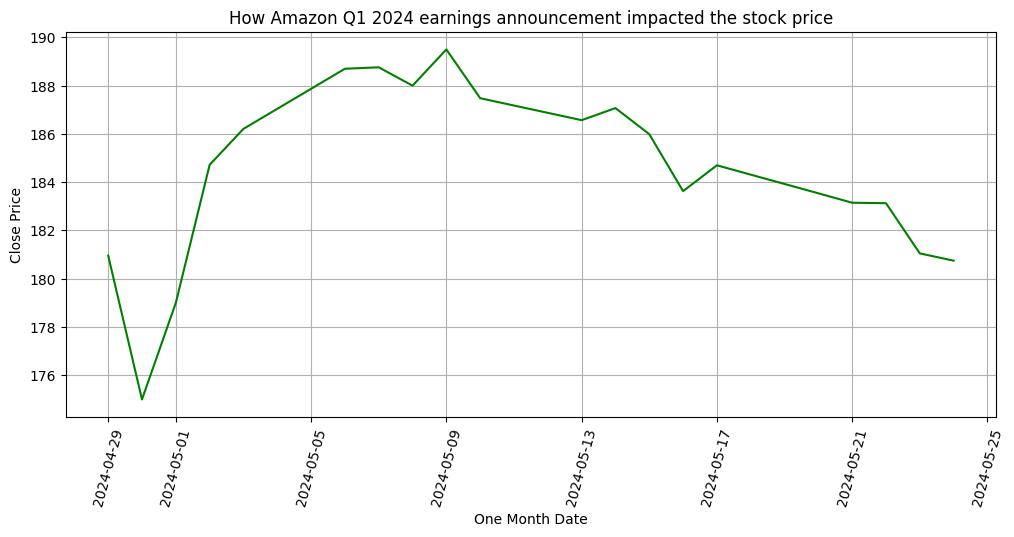

In [49]:
# Determine event data
from datetime import datetime
q1_2024_event_start_date = '2024-04-27'
q1_2024_event_end_date = '2024-05-27'

#filter data for 1 month within Q1 earnings announcement
Q1_earnings = amazon_df.loc[q1_2024_event_start_date:q1_2024_event_end_date]

#visualization
plt.figure(figsize=[12,5])
ax = sns.lineplot(x='Date', y='Close', data=Q1_earnings, color='green')
plt.ylabel('Close Price')
plt.xlabel('One Month Date')
plt.xticks(rotation=75)
plt.grid()
ax.set_title('How Amazon Q1 2024 earnings announcement impacted the stock price')


plt.show()

# 12. What does the Relative Strength Index (RSI) indicate about Amazon’s stock momentum compared to its competitors?

The Relative Strength Index (RSI) is a momentum indicator that helps determine whether a stock is overbought or oversold.

Over the past 5 years, the Relative Strength Index (RSI) of Amazon stock has shown signs of being overbought and oversold particularly during the covid-19 period. During these times, the RSI often exceeded an average of 60-70, indicating overbought conditions, which typically signaled a potential for price corrections. 

On August 19, 2020, amazon stock went below the threshold of 30, indicating oversold sign with a price of $26. The aftermath is that the stock price increased. Another major oversold event was January 27, 2022, May 11, 2022, Nov 7, 2022, August 7, 2024.

Major overbought dates are: July 9, 2021, February 2, 2023, February 8, 2024, April 8, 2024. All these overbought events led to significant decrease in price. 

In comparison,competitor stocks like Walmart, eBay and Alibaba has displayed greater fluctuations in their momentum. For long-term investors, Amazon’s strong momentum is a positive sign, but the frequent overbought signals suggest caution is needed to avoid entering the market at potentially overvalued levels.

In [ ]:
# Calculating the Relative Strength Index (RSI) for Amazon’s stock and its competitors using a period of 14.
import pandas_ta as ta

close_df['amazon_rsi'] = ta.rsi(close_df['amazon'], period = 14)
close_df['walmart_rsi'] = ta.rsi(close_df['walmart'], period = 14)
close_df['ebay_rsi'] = ta.rsi(close_df['ebay'], period = 14)
close_df['alibaba_rsi'] = ta.rsi(close_df['alibaba'], period = 14)
close_df['sp500_rsi'] = ta.rsi(close_df['sp500'], period = 14)

close_df.dropna(inplace=True)


# Create the figure
fig = go.Figure()

# Amazon RSI line
fig.add_trace(go.Scatter(
    x=close_df.index, 
    y=close_df['amazon_rsi'], 
    mode='lines', 
    name='Amazon RSI',
    line=dict(color='blue')
))

# Walmart RSI line
fig.add_trace(go.Scatter(
    x=close_df.index, 
    y=close_df['walmart_rsi'], 
    mode='lines', 
    name='Walmart RSI',
    line=dict(color='green')
))

# eBay RSI line
fig.add_trace(go.Scatter(
    x=close_df.index, 
    y=close_df['ebay_rsi'], 
    mode='lines', 
    name='eBay RSI',
    line=dict(color='orange')
))

#alibaba RSI line

fig.add_trace(go.Scatter(
    x=close_df.index,
    y=close_df['alibaba_rsi'],
    mode='lines',
    name='Alibaba RSI',
    line=dict(color='red')
))


# Update the layout
fig.update_layout(
    title='RSI Comparison for Amazon and competitors Close Price',
    xaxis_title='Date',
    yaxis_title='RSI',
    hovermode='x unified',  
    width=1000, 
    height=400 

)

# Show the interactive plot
fig.show()
